# Scraping popular 3D printing CAD models details from GRABCAD using Selenium & Python
![](https://imgur.com/u9w2H8F.png)

## Objective:

* [Grabcad]('https://grabcad.com/library') evolved into a community for engineers to share CAD models, where engineers could upload and download models from a free CAD library
* Individuals can like and comment each design depending on their interest. 
* In this project, we are going to built code to scrap the CAD models information such as url, author name and count of likes, downloads, comment. And download this data in csv format.


# Introduction:

* Web scraping is a process of collecting structured data in an automated fashion. And it shouldn't come as surprise as web scraping offers something really useful that no other method can. 
* It gives unstructured web data from any open website. And converting and storing that data in spreadsheets

# Outline of the project:

Here are the steps we will follow:

* Select a website to scrap data [grabcad.com/library]('https://grabcad.com/library?page=1&per_page=100&time=all_time&sort=popular&categories=3d-printing') and understand it
* Install and import all required libraries
* Grabcad webpage is dynamically updated from time to time so first we install `kora selenium` web driver to interact with the page and parse the data
* We will parse list of cad_file details from grabCad library. For each cad_file, we will get file title, URL, image URL, number of likes, downloads, and comments.
* We will combine each cad_file data into list of dictionary 
* Finally we'll create a CSV file in the following format:

  `Title, Author, URL, Image_URL, Likes, Downloads, Comments`

  `Creality Sprite Extruder ...,	https://grabcad.com/library/creality-sprite-ex...,	https://d2t1xqejof9utc.cloudfront.net/screensh...,	87,	372,	4`

  `TBO T3 2022 Style convert...,	https://grabcad.com/library/tbo-t3-2022-style-...,	https://d2t1xqejof9utc.cloudfront.net/screensh...,	75,	387,	3`

# Installation and setup

In [1]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 68 kB 2.6 MB/s 


In [2]:
import jovian


In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project='project-grabcad-web-scraping-2')

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Import requests and BeautifulSoup
  `get()` to download page HTML

In [4]:
import  requests
from bs4 import BeautifulSoup 

## Installation of Kora.Selenium

In [5]:
!pip install selenium-wire --quiet

     |████████████████████████████████| 239 kB 5.1 MB/s 
     |████████████████████████████████| 57 kB 3.8 MB/s 
     |████████████████████████████████| 357 kB 49.2 MB/s 
     |████████████████████████████████| 2.5 MB 52.1 MB/s 
     |████████████████████████████████| 6.3 MB 54.3 MB/s 
     |████████████████████████████████| 57 kB 2.2 MB/s 
     |████████████████████████████████| 4.0 MB 6.8 MB/s 
     |████████████████████████████████| 140 kB 46.6 MB/s 
     |████████████████████████████████| 384 kB 53.4 MB/s 
     |████████████████████████████████| 58 kB 4.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.13 which is incompatible.


In [6]:
!pip install kora -q --quiet
from kora.selenium import wd

     |████████████████████████████████| 57 kB 2.9 MB/s 
     |████████████████████████████████| 1.6 MB 11.0 MB/s 


![](https://imgur.com/FCYFF52.png)

## Import required webdriver libraries

In [7]:
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from seleniumwire import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import time



In [8]:
options = Options()
options.add_argument('--no-sandbox')
options.add_argument('--headless')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--disable-blink-features=AutomationControlled')
wd = webdriver.Chrome(executable_path="chromedriver",options = options)

In [9]:
print(wd.execute_script("return navigator.userAgent;"))
# Setting user agent as Chrome/83.0.4103.97
wd.execute_cdp_cmd('Network.setUserAgentOverride', {"userAgent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36'})
print(wd.execute_script("return navigator.userAgent;"))
# Setting user agent as Chrome/83.0.4103.53
wd.execute_cdp_cmd('Network.setUserAgentOverride', {"userAgent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.53 Safari/537.36'})
print(wd.execute_script("return navigator.userAgent;"))

Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/108.0.5359.71 Safari/537.36
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.53 Safari/537.36


# Get into the website and get webpage 

Let's write a function to get the webpage

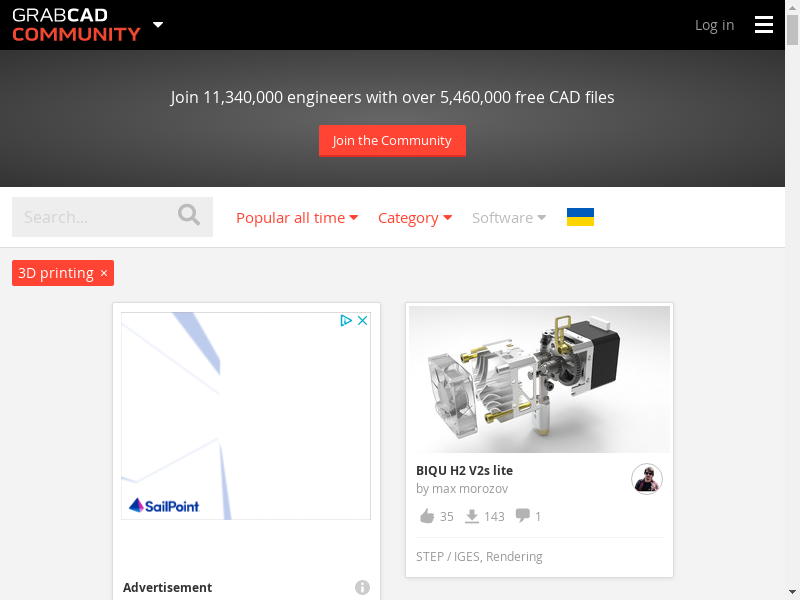

In [10]:
website = 'https://grabcad.com/library?page=1&per_page=100&time=all_time&sort=popular&categories=3d-printing'
wd.get(website)
wd

## Define a function to get status of webpage

In [11]:
def check_status_code(website):
  
  response = requests.get(website)

  # A Valid url status code ranges between 200 to 299
  if not response.ok:
     raise Exception ('Failed to fetch the webpage')
  
  return response.status_code

In [12]:
check_status_code(website)

200

## Defining a function to find all elements in the page

In [13]:
def get_files(website, wd):
  k = []
  wd.get(website)
  get_data =  wd.find_elements(By.CLASS_NAME, 'modelCard')

  for i in get_data:
    k.append(i)
  return k


`get_files` can be used to get the each element in the page
![](https://imgur.com/RachQgp.png)

Find out number of total elements in the page

In [14]:
item_box = get_files(website, wd)
print(len(item_box))

101


In [15]:
item_box[1]

<div class="modelCard">
        <div class="imageArea">
          <div class="hoverInfo">
            <a href="/library/biqu-h2-v2s-lite-1" class="modelLink">
              <img class="previewImage" ng-src="https://d2t1xqejof9utc.cloudfront.net/screenshots/pics/9f40f8e3a8d8f36f8456aab6bd3e8835/card.jpg" err-src="https://d2t1xqejof9utc.cloudfront.net/screenshots/pics/missing_small.png" alt="BIQU H2 V2s lite" src="https://d2t1xqejof9utc.cloudfront.net/screenshots/pics/9f40f8e3a8d8f36f8456aab6bd3e8835/card.jpg" style="display: block;">
            </a>
            <div class="actions">
              <div class="buttons">
                <span class="background"></span>
                <span class="actionButton gc-icon gc-icon-3d-white" ng-click="showViewableFilesModal(model)" analytics-on="click" analytics-category="Unauthenticated: 3d views" analytics-event="3d view in library" analytics-label="biqu-h2-v2s-lite-1">
                </span>
              </div>
              <a href="/libr

## Function to get number of page URLS
There are 100 models per page, so let's scrap up to 2 pages

In [16]:
def get_page_urls():
    urls=[]
    # Let's scrap data for 2 pages
    for i in range(1,6):
        website='https://grabcad.com/library?page={}&per_page=100&time=all_time&sort=popular&categories=3d-printing'.format(*str(i))

        urls.append(website)
    return urls

In [17]:
urls = (get_page_urls())
urls

['https://grabcad.com/library?page=1&per_page=100&time=all_time&sort=popular&categories=3d-printing',
 'https://grabcad.com/library?page=2&per_page=100&time=all_time&sort=popular&categories=3d-printing',
 'https://grabcad.com/library?page=3&per_page=100&time=all_time&sort=popular&categories=3d-printing',
 'https://grabcad.com/library?page=4&per_page=100&time=all_time&sort=popular&categories=3d-printing',
 'https://grabcad.com/library?page=5&per_page=100&time=all_time&sort=popular&categories=3d-printing']

# Let's create simple functions to parse required data from the page

## 1. Parsing Title of te cad_model



In [18]:
def get_title(item_box):
  title_tag = item_box.find_elements(By.CLASS_NAME, 'modelInfo')
  title = title_tag[0].find_elements(By.TAG_NAME, 'a')[0].text

  return title

![](https://imgur.com/ahZdk88.png)

In [19]:
get_title(item_box[2])

'Artsy - Core-XY 3d printe...'

In [20]:
# print first 4 cad_model titles
for i in item_box[1:5]:
  print(get_title(i))

BIQU H2 V2s lite
Artsy - Core-XY 3d printe...
2 Axis FPV Camera Gimbal
3D printer Duet 2 Wi-Fi W...


## 2. Parsing Author_name of model

In [21]:
def get_author(item_box):
  author_tag = item_box.find_elements(By.CLASS_NAME, 'author')
  
  author = author_tag[0].find_elements(By.TAG_NAME, 'a')[0].text

  return author

  

![](https://imgur.com/1jGrGxK.png)

In [22]:
get_author(item_box[2])

'Anders Wedin'

In [23]:
# print few cad_model Author names
for i in item_box[1:5]:
  print(get_author(i))

max morozov
Anders Wedin
Felipe Westin
Zhenya Danilau


## 3. Parse URL of the particular item_box

In [24]:
def get_url(item_box):
 
  url_tag = item_box.find_element(By.CLASS_NAME, 'modelLink')
  url = url_tag.get_attribute('href')

  return url
  

![](https://imgur.com/fsfvW3m.png)

In [25]:
get_url(item_box[2])

'https://grabcad.com/library/artsy-core-xy-3d-printer-1'

In [26]:
# Print first 4 model URLS
for i in item_box[1:5]:
  print(get_url(i))

https://grabcad.com/library/biqu-h2-v2s-lite-1
https://grabcad.com/library/artsy-core-xy-3d-printer-1
https://grabcad.com/library/2-axis-fpv-camera-gimbal-1
https://grabcad.com/library/3d-printer-duet-2-wi-fi-with-2-extruders-1


## 4. Parsing item Image_URL

In [27]:
def get_image(item_box):
 
  image_tag = item_box.find_element(By.CLASS_NAME, 'previewImage')
  image = image_tag.get_attribute('src')
  

  return image

![](https://imgur.com/r1Lo1rB.png)

In [28]:
get_image(item_box[2])

'https://d2t1xqejof9utc.cloudfront.net/screenshots/pics/9681206263ef841812ebe556389f605e/card.jpg'

In [29]:
# print first 4 image URLS
for i in item_box[1:5]:
  print(get_image(i))

https://d2t1xqejof9utc.cloudfront.net/screenshots/pics/9f40f8e3a8d8f36f8456aab6bd3e8835/card.jpg
https://d2t1xqejof9utc.cloudfront.net/screenshots/pics/9681206263ef841812ebe556389f605e/card.jpg
https://d2t1xqejof9utc.cloudfront.net/screenshots/pics/fd098865c35fe402516aa962af62532d/card.jpg
https://d2t1xqejof9utc.cloudfront.net/screenshots/pics/b0c57a2c3158ef1e9eb9ddf080636fe1/card.jpg


## 5. Parse number of Likes

In [30]:
def get_likes(item_box):
  count_tag = item_box.find_elements(By.CLASS_NAME, 'counts')
  like = count_tag[0].find_elements(By.TAG_NAME, 'span')[0].text

  return like

![](https://imgur.com/eFmwB2p.png)

In [31]:
get_likes(item_box[5])

'60'

In [32]:
# print firs 4 models count of likes
for i in item_box[1:5]:
  print(f'Likes: {get_likes(i)}')

Likes: 35
Likes: 48
Likes: 35
Likes: 92


## 6. Parse number of Downloads

In [33]:
def get_downloads(item_box):
  count_tag = item_box.find_elements(By.CLASS_NAME, 'counts')

  for downloads in count_tag:
    download = downloads.find_elements(By.TAG_NAME, 'span')[3].text

  return download


![](https://imgur.com/kUPBJ0r.png)

In [34]:
get_downloads(item_box[5])

'188'

In [35]:
# print few models count of downloads
for i in item_box[1:5]:
  print(f'Downloads : {get_downloads(i)}')

Downloads : 143
Downloads : 224
Downloads : 161
Downloads : 384


## 7. Parse number of Comments

In [36]:
def get_comments(item_box):
  count_tag = item_box.find_elements(By.CLASS_NAME, 'counts')
  comment = count_tag[0].find_elements(By.TAG_NAME, 'a')[0].text

  return comment




![](https://imgur.com/aoZOPnm.png)

In [37]:
get_comments(item_box[2])

'4'

In [38]:
# print first four count of comments
for i in item_box[1:5]:
  print(f'Comments : {get_comments(i)}')

Comments : 1
Comments : 4
Comments : 2
Comments : 6


# Write parsed data into a list of dictionary


`parse_cad_data` function can be used to write the scraped data into a list of dictionaries

In [39]:
def get_pages_data():
  pages = get_page_urls()
  cad_models = {'Title':[],
                'Author':[],
                'URL':[],
                'Image_URL':[],
                'Likes':[],
                'Downloads':[],
                'Comments':[]
                }
  for i in pages:
    item_boxes = get_files(i, wd)
    for item_box in item_boxes[1:]:

      WebDriverWait(wd, 30).until(EC.visibility_of_all_elements_located((By.XPATH, "//span[@class='text ng-binding']")))
      
      cad_models['Title'].append(get_title(item_box))
      cad_models['Author'].append(get_author(item_box))
      cad_models['URL'].append(get_url(item_box))
      cad_models['Image_URL'].append(get_image(item_box))
      cad_models['Likes'].append(get_likes(item_box))
      cad_models['Downloads'].append(get_downloads(item_box))
      cad_models['Comments'].append(get_comments(item_box))
      

  return cad_models




In [40]:
final_data = get_pages_data()
final_data

KeyboardInterrupt: ignored

# Store data in Pandas dataframe 

In [ ]:
import pandas as pd
df_grabCad_library = pd.DataFrame(final_data)
df_grabCad_library

# Create a CSV file

In [ ]:
from IPython.lib.display import exists
from google.colab import files
df_grabCad_library.to_csv('grabCad_lirary.csv', index=False)
 # files.download is to download the csv file into our system 
files.download('grabCad_lirary.csv')
# read the csv file using pandas library
df = pd.read_csv('grabCad_lirary.csv')
print(df)

# Summary

* Scraped Popular 3D printing CAD models details from [grabcad.com/library]('https://grabcad.com/library?page=1&per_page=100&time=all_time&sort=popular&categories=3d-printing') using `kora.selenium` on Google colab

* For each model, we got title, author, URL, image_URL and counts of likes, downloads and comments

* We created a list of dictionary to store the each model information and store the data into Pandas dataframe

* Finally, saved 200 rows & 7 columns of dataframe into a CSV file


# Reference

* [Python webscraping tutorial]('https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/web-scraping-with-selenium-aws') by N S. Aakash from Jovian
* [Selenium documentation]("https://selenium-python.readthedocs.io/")
* https://stackoverflow.com


# Ideas for future work

* Get more data by accessing each model url and scrape attributes such as uploaded date, software used etc.
* Optimize the code functions and better understanding


Save work in Jovian profile

In [ ]:
jovian.commit(files = ['grabCad_lirary.csv'])

In [ ]:
jovian.commit(project='project-grabcad-web-scraping')